In [1]:
# Importing Libraries
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import sklearn
import numpy as np

In [2]:
NSE = yf.Ticker('^NSEI')

In [3]:
NSE = NSE.history(period = "max")

In [4]:
NSE

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,0.0,0.0
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,0.0,0.0
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,0.0,0.0
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,0.0,0.0
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-18 00:00:00+05:30,19301.750000,19373.800781,19253.599609,19310.150391,256100,0.0,0.0
2023-08-21 00:00:00+05:30,19320.650391,19425.949219,19296.300781,19393.599609,262600,0.0,0.0
2023-08-22 00:00:00+05:30,19417.099609,19443.500000,19381.300781,19396.449219,208700,0.0,0.0


In [5]:
NSE.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2023-08-10 00:00:00+05:30', '2023-08-11 00:00:00+05:30',
               '2023-08-14 00:00:00+05:30', '2023-08-16 00:00:00+05:30',
               '2023-08-17 00:00:00+05:30', '2023-08-18 00:00:00+05:30',
               '2023-08-21 00:00:00+05:30', '2023-08-22 00:00:00+05:30',
               '2023-08-23 00:00:00+05:30', '2023-08-24 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=3907, freq=None)

<Axes: xlabel='Date'>

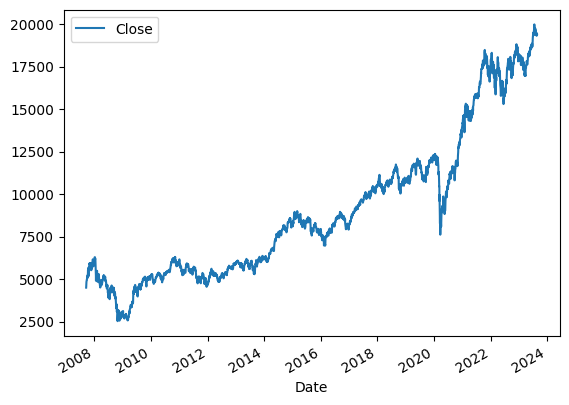

In [6]:
NSE.plot.line(y="Close", use_index = True)

In [7]:
del NSE["Dividends"]
del NSE["Stock Splits"]

In [8]:
NSE["Tomorrow"] = NSE["Close"].shift(-1)

In [9]:
NSE

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195
...,...,...,...,...,...,...
2023-08-18 00:00:00+05:30,19301.750000,19373.800781,19253.599609,19310.150391,256100,19393.599609
2023-08-21 00:00:00+05:30,19320.650391,19425.949219,19296.300781,19393.599609,262600,19396.449219
2023-08-22 00:00:00+05:30,19417.099609,19443.500000,19381.300781,19396.449219,208700,19444.000000


In [10]:
NSE["Target"] = (NSE["Tomorrow"] > NSE['Close']).astype(int)

In [11]:
NSE

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2023-08-18 00:00:00+05:30,19301.750000,19373.800781,19253.599609,19310.150391,256100,19393.599609,1
2023-08-21 00:00:00+05:30,19320.650391,19425.949219,19296.300781,19393.599609,262600,19396.449219,1
2023-08-22 00:00:00+05:30,19417.099609,19443.500000,19381.300781,19396.449219,208700,19444.000000,1


In [12]:
#define ticker and fetch records
stock = input("enter a Ticker\n")
start_date = input("Enter start date to fetch records in yyyy-mm-dd format")
end_date = input("Enter end date to fetch records in yyyy-mm-dd format")

data = yf.download(stock, start = start_date , end = end_date)

print(data)

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-02-14  1490.000000  1499.449951  1469.300049  1473.699951  1440.245605   
2022-02-15  1476.000000  1524.900024  1473.050049  1517.800049  1483.344604   
2022-02-16  1534.349976  1534.750000  1507.000000  1515.750000  1481.340942   
2022-02-17  1513.099976  1522.000000  1502.000000  1506.500000  1472.300903   
2022-02-18  1498.300049  1517.000000  1490.449951  1512.349976  1478.018188   
...                 ...          ...          ...          ...          ...   
2023-08-11  1638.400024  1638.400024  1616.199951  1618.800049  1618.800049   
2023-08-14  1611.000000  1615.000000  1600.250000  1610.900024  1610.900024   
2023-08-16  1583.099976  1609.650024  1581.300049  1606.199951  1606.199951   
2023-08-17  1597.599976  1609.900024  1594.000000  1597.300049

In [13]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,1490.000000,1499.449951,1469.300049,1473.699951,1440.245605,7328310
2022-02-15,1476.000000,1524.900024,1473.050049,1517.800049,1483.344604,6567533
2022-02-16,1534.349976,1534.750000,1507.000000,1515.750000,1481.340942,5016132
2022-02-17,1513.099976,1522.000000,1502.000000,1506.500000,1472.300903,3675604
2022-02-18,1498.300049,1517.000000,1490.449951,1512.349976,1478.018188,3898064
...,...,...,...,...,...,...
2023-08-11,1638.400024,1638.400024,1616.199951,1618.800049,1618.800049,14112911
2023-08-14,1611.000000,1615.000000,1600.250000,1610.900024,1610.900024,15652205
2023-08-16,1583.099976,1609.650024,1581.300049,1606.199951,1606.199951,17068771


In [14]:
df = pd.DataFrame(data)

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-14,1490.000000,1499.449951,1469.300049,1473.699951,1440.245605,7328310
2022-02-15,1476.000000,1524.900024,1473.050049,1517.800049,1483.344604,6567533
2022-02-16,1534.349976,1534.750000,1507.000000,1515.750000,1481.340942,5016132
2022-02-17,1513.099976,1522.000000,1502.000000,1506.500000,1472.300903,3675604
2022-02-18,1498.300049,1517.000000,1490.449951,1512.349976,1478.018188,3898064


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375 entries, 2022-02-14 to 2023-08-18
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       375 non-null    float64
 1   High       375 non-null    float64
 2   Low        375 non-null    float64
 3   Close      375 non-null    float64
 4   Adj Close  375 non-null    float64
 5   Volume     375 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 20.5 KB


In [17]:
#Making date as a feature
df['date'] = pd.to_datetime(df.index)

In [18]:
df

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2022-02-14,1490.000000,1499.449951,1469.300049,1473.699951,1440.245605,7328310,2022-02-14
2022-02-15,1476.000000,1524.900024,1473.050049,1517.800049,1483.344604,6567533,2022-02-15
2022-02-16,1534.349976,1534.750000,1507.000000,1515.750000,1481.340942,5016132,2022-02-16
2022-02-17,1513.099976,1522.000000,1502.000000,1506.500000,1472.300903,3675604,2022-02-17
2022-02-18,1498.300049,1517.000000,1490.449951,1512.349976,1478.018188,3898064,2022-02-18
...,...,...,...,...,...,...,...
2023-08-11,1638.400024,1638.400024,1616.199951,1618.800049,1618.800049,14112911,2023-08-11
2023-08-14,1611.000000,1615.000000,1600.250000,1610.900024,1610.900024,15652205,2023-08-14
2023-08-16,1583.099976,1609.650024,1581.300049,1606.199951,1606.199951,17068771,2023-08-16


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2022-02-14,1490.000000,1499.449951,1469.300049,1473.699951,1440.245605,7328310,2022-02-14
2022-02-15,1476.000000,1524.900024,1473.050049,1517.800049,1483.344604,6567533,2022-02-15
2022-02-16,1534.349976,1534.750000,1507.000000,1515.750000,1481.340942,5016132,2022-02-16
2022-02-17,1513.099976,1522.000000,1502.000000,1506.500000,1472.300903,3675604,2022-02-17
2022-02-18,1498.300049,1517.000000,1490.449951,1512.349976,1478.018188,3898064,2022-02-18


In [20]:
# Making a Candlestick graph
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                                     open= df['Open'],
                                     high = df['High'],
                                     low = df['Low'],
                                     close = df['Close'])])
# Updating the layout
fig.update_layout(
    title = 'Stock Price Chart',
    yaxis_title = 'Price(rupees)',
    xaxis_rangeslider_visible = False
)


fig.show()

In [21]:
# Dropping date and volume to make it less complex
df.drop(['date', 'Volume'], axis = 1 , inplace = True)

In [22]:
df.reset_index(drop=True, inplace = True)

In [23]:
df

,Open,High,Low,Close,Adj Close
0,1490.000000,1499.449951,1469.300049,1473.699951,1440.245605
1,1476.000000,1524.900024,1473.050049,1517.800049,1483.344604
2,1534.349976,1534.750000,1507.000000,1515.750000,1481.340942
3,1513.099976,1522.000000,1502.000000,1506.500000,1472.300903
4,1498.300049,1517.000000,1490.449951,1512.349976,1478.018188
...,...,...,...,...,...
370,1638.400024,1638.400024,1616.199951,1618.800049,1618.800049
371,1611.000000,1615.000000,1600.250000,1610.900024,1610.900024
372,1583.099976,1609.650024,1581.300049,1606.199951,1606.199951
373,1597.599976,1609.900024,1594.000000,1597.300049,1597.300049


<Axes: >

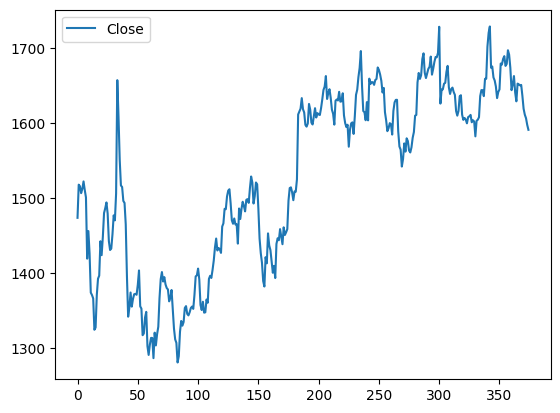

In [24]:
df.plot.line(y="Close", use_index = True)

In [25]:
df.reset_index(drop=True, inplace = True)

R-squared (R²) Score: 0.9997490542535088


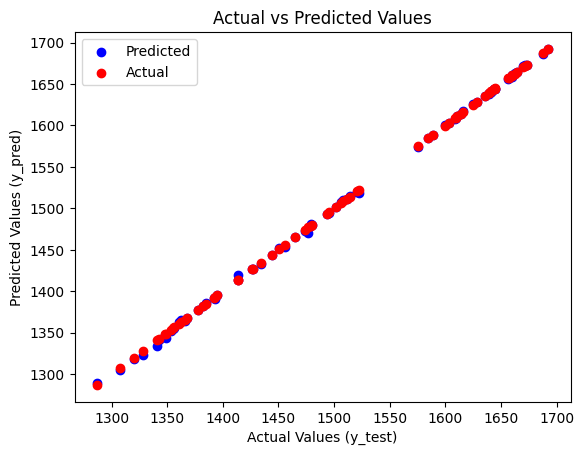

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Features
X = df[['Open','Close', 'High', 'Low', 'Adj Close']]
# Target Values
y = df['Close']

X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

rf = RandomForestRegressor(n_estimators = 100 , random_state = 42)
#Training
rf.fit(X_train.values, y_train.values)

y_pred = rf.predict(X_test.values)

# Using R-squared to check accuracy in the model
r2 = r2_score(y_test, y_pred)
print("R-squared (R²) Score:", r2)

# Scatter plot of y_pred and y_test
#plt.scatter(y_test, y_pred)
#plt.xlabel('Actual Values (y_test)')
#plt.ylabel('Predicted Values (y_pred)')
#plt.title('Actual vs Predicted Values')
#plt.show()

plt.scatter(y_test, y_pred, color='blue', label='Predicted')  # Scatter plot for y_pred with blue color
plt.scatter(y_test, y_test, color='red', label='Actual')  # Scatter plot for y_test with red color
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs Predicted Values')
plt.legend()  # Add legend to differentiate the scatter plots
plt.show()

In [27]:
df.tail()

,Open,High,Low,Close,Adj Close
370,1638.400024,1638.400024,1616.199951,1618.800049,1618.800049
371,1611.000000,1615.000000,1600.250000,1610.900024,1610.900024
372,1583.099976,1609.650024,1581.300049,1606.199951,1606.199951
373,1597.599976,1609.900024,1594.000000,1597.300049,1597.300049
374,1587.550049,1596.300049,1585.500000,1590.750000,1590.750000


In [28]:
#Inputting Value of features
initial_array = np.array([['x', 'y', 'z', 'a', 'b']])
updated_array = np.concatenate((initial_array[:-1], df.tail(1).values))
print(updated_array)

#Predicting
predicted_price = rf.predict(updated_array)

print(predicted_price[0])

[['1587.550048828125' '1596.300048828125' '1585.5' '1590.75' '1590.75']]
1597.1900170898436
